# Implementation of backpropagation

Estimated time: 1h

## Overview

In this notebook we train a 1 hidden layer neural network on the artificial two moons dataset.
The particularity is that we manually implement the update rule of a backpropagation algorithm.
The goal is to give an insight on how machine learning toolboxes work under the hood, and to understand why we need these toolboxes to build complex training pipelines.
Here we do not use such toolboxes, but rather implement a back propagation algorithm using the numpy library.

The code for this tutorial was found here:
- Walkthrough backpropagation algorithm: https://cs231n.github.io/optimization-2/

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

The dataset we use is the standard two-moons dataset, which is a non-linear binary classification task.

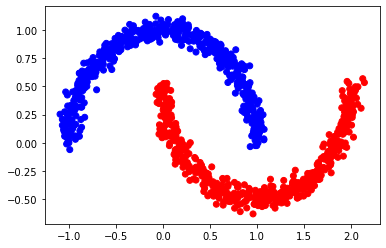

In [2]:
x,y = datasets.make_moons(n_samples=1000, noise=0.05)
y = np.hstack([1-y[:,None],y[:,None]])

colors = 'rb'
c_ = [colors[yy] for yy in y[:,0]]


plt.figure()
plt.scatter(x[:,0], x[:,1], c=c_)

Let us first initialize the hyper-parameters of our neural network.

In [3]:
# Network definitions

d = 2 # Input space dimension
n1 = 2 # First layer hidden size
q = 2  # Target space dimension

# Initialize NN
hidden_sizes = [(d,n1), (n1,q)]
print(hidden_sizes)

[(2, 2), (2, 2)]


Before computing the backpropagation algorithm, we must define the forward pass algorithm of our network.

- Task 1: Write the forward pass for the network pre-defined above, assuming that the non-linearity is the relu function

The loss we propose to use is the mean squared error function.

- Task 2: Write the gradient of the loss function wrt to the output of the network you have computed in the previous task.

The core of the back propagation algorithm is implemented for you, all that's left is to implement the weight update rule.

- Task 3: Implement the weight update rule with a learning rate of 1

If every thing works as expected, you should see the loss converging.

Now that we have a functional back propagation algorithm, we can try changing the learning rate and see how this impacts the convergence speed.

Text(0, 0.5, 'Loss')

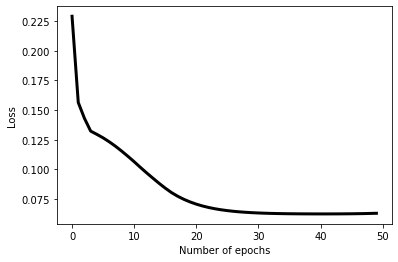

In [4]:
# Weight initialization

w1 = np.random.randn(hidden_sizes[0][1],hidden_sizes[0][0])
w2 = np.random.randn(hidden_sizes[1][1],hidden_sizes[1][0])

# Training loop
nepochs = 50

loss = np.zeros(nepochs)

for ix in range(nepochs):
    n_samples = x.shape[0]
    # Forward pass: compute y_pred    
    #
    ## Task 1
    a1 = x
    z2 = a1 @ w1
    a2 = np.maximum(z2, 0)
    z3 = a2 @ w2
    # a3 = np.maximum(z3, 0)
    y_pred = z3
    
    # Compute loss
    loss[ix] = (0.5) * np.square(y_pred - y).mean()

    # Gradient of loss wrt network's output
    # 
    ## Task 2
    d3 = y_pred - y
    
    grad2 = a2.T @ d3 / n_samples
    d2_tmp = d3 @ w2.T
    d2 = d2_tmp.copy()
    d2[z2 <= 0] = 0 #  d2 = d2 * derivative of ReLU function
    grad1 = a1.T @ d2 / n_samples
    
    # Update weights
    #
    ## Task 3
    w1 = w1 - grad1
    w2 = w2 - grad2


# Plot the loss
plt.figure()
plt.plot(loss,'k',lw=3)
plt.xlabel("Number of epochs")
plt.ylabel("Loss")